In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


This dataset is about predicitng the economic index which basically tells us about the ifnlation or cost of living using values like loan rates and unemployment rates.

In [5]:

df = pd.read_csv('datasets/economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True)

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

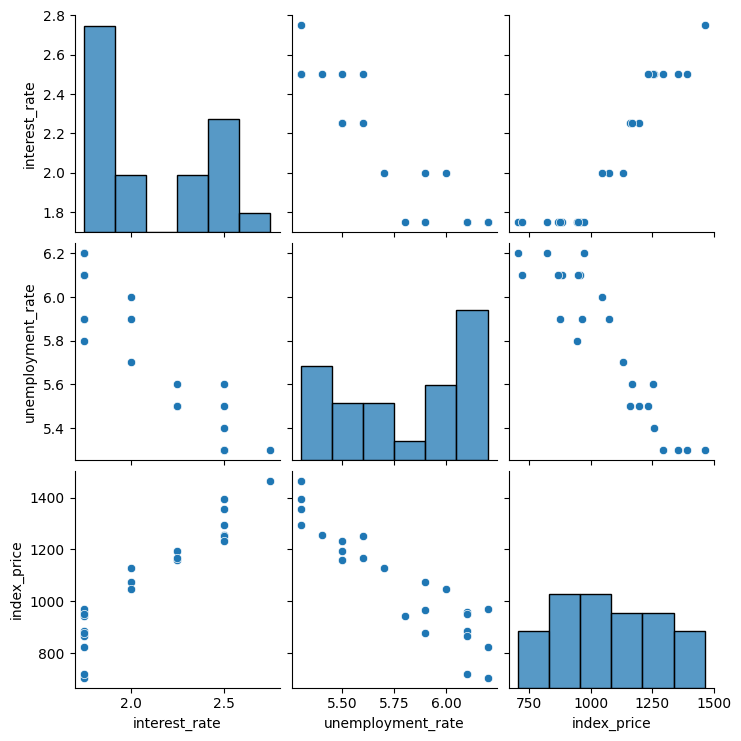

In [13]:
import seaborn as sns
sns.pairplot(df)

In [14]:
df.corr()


,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


The above correlation shows that unemployment rate and interest rate have a negative correlation ie when one increases the other decreases. On the other hand, interest rate and index price have a very high positive correlation.

In [23]:
x = df[['interest_rate', 'unemployment_rate']]
x.shape


(24, 2)

In [24]:
x.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [25]:
y = df['index_price']
y.shape

(24,)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

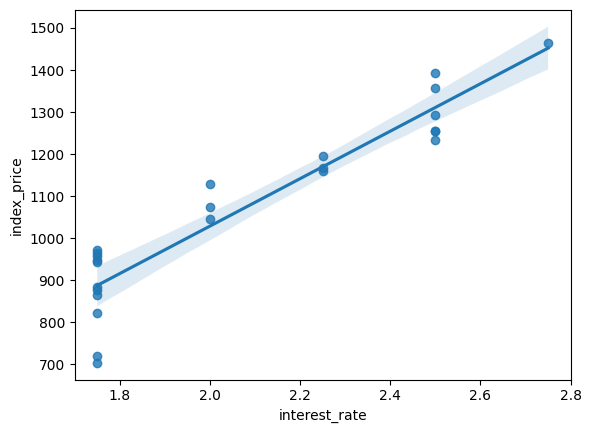

In [39]:
sns.regplot(x = df['interest_rate'], y = df['index_price'])

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()


In [44]:
regr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(regr, x_train, y_train, scoring='neg_mean_squared_error', 
                            cv = 3)


Applying CrossValidation as it gives more robust estimation of model performance and prevents overfitting

In [53]:
val_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [54]:
np.mean(val_score)

np.float64(-5914.828180162392)

In [56]:
y_pred = regr.predict(x_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [68]:
print("Slope: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Slope:  [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  8108.567426306613
MAE:  73.804449323371
RMSE:  90.04758423359625


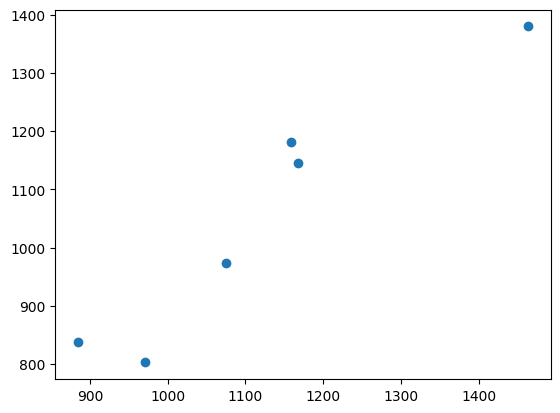

In [61]:
# To check performance of model 
# shows that the there is a linear reln between actual and pred values
plt.scatter(y_test, y_pred)

In [64]:

residuals = y_test - y_pred
print(residuals)


8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


By plotting this Kernel Density Estimation we can see that a normal distributon is being created and hence the model is performing well on test data as well


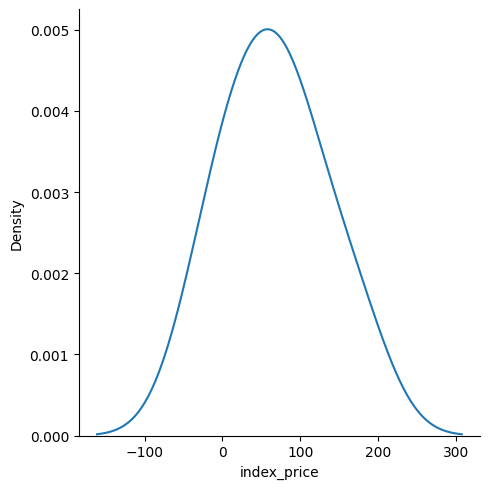

In [66]:
sns.displot(residuals, kind='kde')

We can see below that the scattered points are uniformly distributed and don't follow any pattern

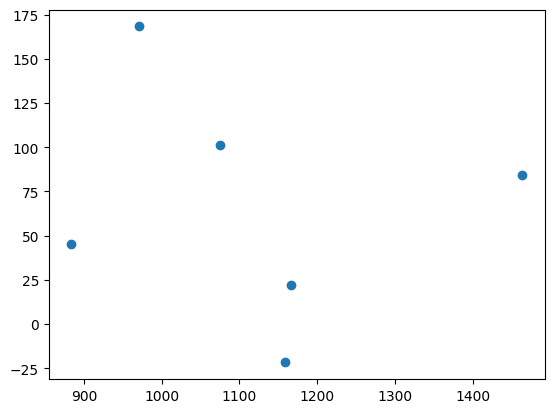

In [67]:
plt.scatter(y_test, residuals)